# Notebook to 10vs10 analysis

In [1]:
%matplotlib inline
%run ~/work/washu/bed/bedtrace.py
import matplotlib.pyplot as plt

# Diffbind data preparation 10vs10
Use the following cmd to prepare config for DiffBind: 

```
bash ~/work/washu/analysis/diffbind_config.sh /Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed k27ac_10vs10 > k27ac_10vs10_diffbind.csv
bash ~/work/washu/analysis/diffbind_config.sh /Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed k4me1_10vs10_reseq > k4me1_10vs10_reseq_diffbind.csv
```


# K27ac

In [2]:
import pandas as pd

def load(path):
    db = pd.read_csv(path, sep='\t')

    YDS={}
    for index, row in db[db['Condition'] == 'Y'].iterrows():
        peaks = row['Peaks'].replace('.xls', '.broadPeak')
        YDS[row['SampleID']] = Bed(peaks)
    print ('K27ac YDS: {}'.format(len(YDS)))
    for k, v in YDS.items():
        print('{}: {}'.format(k, v.count()))    

    ODS={}
    for index, row in db[db['Condition'] == 'O'].iterrows():
        peaks = row['Peaks'].replace('.xls', '.broadPeak')
        ODS[row['SampleID']] = Bed(peaks)
    print('K27ac ODS: {}'.format(len(ODS)))
    for k, v in ODS.items():
        print('{}: {}'.format(k, v.count()))    
    return YDS, ODS

K27ac_YDS, K27ac_ODS = load('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/k27ac_10vs10_diffbind.csv')
# Filter out tracks with bad quality    
K27ac_YDS = {k:K27ac_YDS[k] for k in K27ac_YDS.keys() if k not in ['YD14', 'YD16']} 

K27ac YDS: 17
YD9: 58643
YD20: 23629
YD8: 51938
YD5: 50726
YD16: 7791
YD4: 56380
YD12: 47291
YD15: 15864
YD19: 29209
YD6: 55914
YD7: 54088
YD14: 1101
YD21: 14062
YD11: 58498
YD18: 23708
YD17: 25733
YD10: 26377
K27ac ODS: 17
OD18: 16683
OD11: 12801
OD10: 34771
OD14: 39058
OD20: 18426
OD13: 38028
OD12: 26549
OD4: 33925
OD7: 25602
OD16: 33719
OD5: 37698
OD17: 22374
OD9: 35452
OD6: 41696
OD15: 34798
OD19: 32576
OD8: 29302


# Peaks distribution

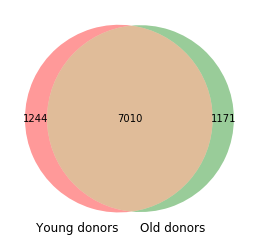

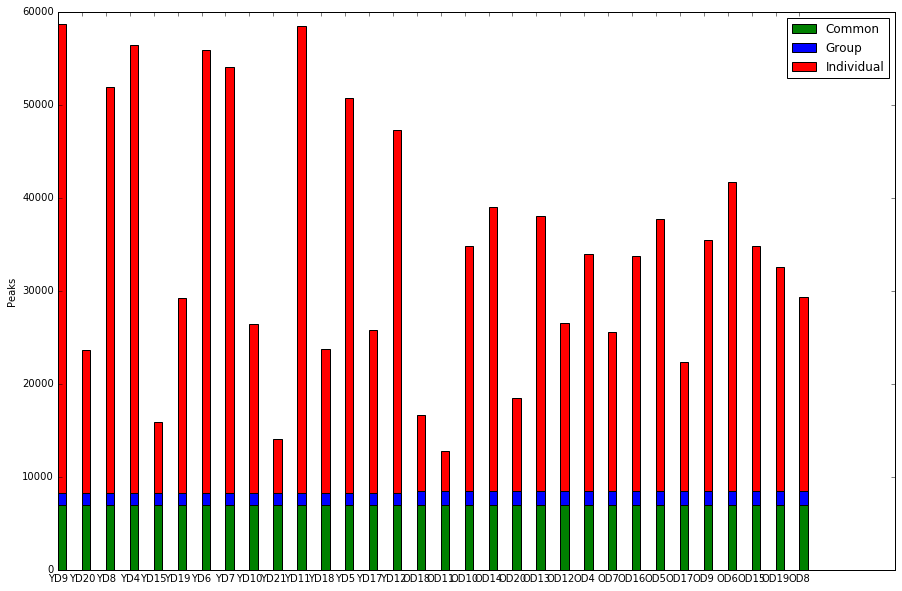

In [4]:
import numpy as np

def intersect_peaks(YDS, ODS):
    YD_intersection = intersect(*YDS.values())
    OD_intersection = intersect(*ODS.values())
    YD_OD_intersection = intersect(YD_intersection, OD_intersection)
    metapeaks({'Young donors': YD_intersection, 'Old donors': OD_intersection})
    plt.show()
   
    N = len(YDS) + len(ODS)
    ind=np.arange(N)

    common_peaks = [YD_OD_intersection.count()] * N 
    group_specific = [YD_intersection.count() - YD_OD_intersection.count()] * len(YDS) +\
                    [OD_intersection.count() - YD_OD_intersection.count()] * len(ODS)
    sample_specific = []
    names = []
    for k, v in YDS.items():
        sample_specific.append(v.count() - YD_intersection.count())
        names.append(k)
    for k, v in ODS.items():
        sample_specific.append(v.count() - OD_intersection.count())
        names.append(k)
    
    plt.figure(figsize=(15,10))
    width=0.35
    p1 = plt.bar(ind, common_peaks, width, color='green')
    p2 = plt.bar(ind, group_specific, width, bottom=common_peaks, color='blue')
    p3 = plt.bar(ind, sample_specific, width, bottom=np.sum([common_peaks,group_specific], axis=0), color='red')
    plt.ylabel('Peaks')
    plt.xticks(ind, names)
    plt.legend((p1[0], p2[0], p3[0]), ('Common', 'Group', 'Individual'))
    plt.show()

intersect_peaks(K27ac_YDS, K27ac_ODS)

# Consistency with previous K27ac 3vs3

YD2 YD_ac_BC2_R1_hg19_0.1_peaks.broadPeak 40150
YD3 YD_ac_BC3_R1_hg19_0.1_peaks.broadPeak 42600
YD1 YD_ac_BC1_R1_hg19_0.1_peaks.broadPeak 31848
OD6 OD_ac_BC6_R1_hg19_0.1_peaks.broadPeak 38795
OD4 OD_ac_BC4_R1_hg19_0.1_peaks.broadPeak 35592
OD5 OD_ac_BC5_R1_hg19_0.1_peaks.broadPeak 62762
K27ac 3vs3 Y peaks 22246
K27ac 3vs3 O peaks 25025
K27ac 3vs3 O and Y peaks 19245


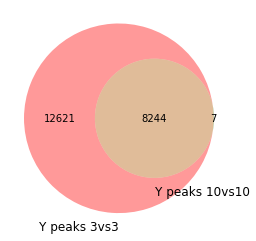

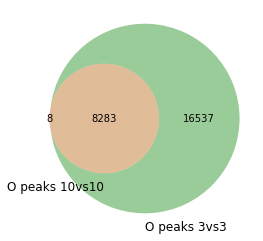

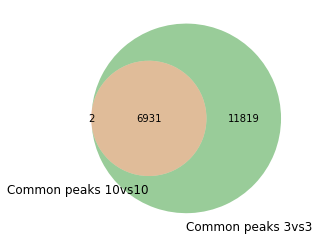

In [5]:
K27AC_3VS3_PEAKS_FOLDER='/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/3vs3_2/k27ac_bams_macs_broad_0.1'
K27AC_3VS3_PEAKS_NAMES={
    'OD4': 'OD_ac_BC4_R1_hg19_0.1_peaks.broadPeak',
    'OD5': 'OD_ac_BC5_R1_hg19_0.1_peaks.broadPeak',
    'OD6': 'OD_ac_BC6_R1_hg19_0.1_peaks.broadPeak',
    'YD1': 'YD_ac_BC1_R1_hg19_0.1_peaks.broadPeak',
    'YD2': 'YD_ac_BC2_R1_hg19_0.1_peaks.broadPeak',
    'YD3': 'YD_ac_BC3_R1_hg19_0.1_peaks.broadPeak'
}
K27AC_3VS3_PEAKS={}
for id, filename in K27AC_3VS3_PEAKS_NAMES.items():
    K27AC_3VS3_PEAKS[id] = Bed(os.path.join(K27AC_3VS3_PEAKS_FOLDER, filename))
for n,p in K27AC_3VS3_PEAKS.items():
    print(n, str(p), p.count())


YD_intersection_3vs3 = intersect(*[K27AC_3VS3_PEAKS[k] for k in K27AC_3VS3_PEAKS.keys() if 'Y' in k])
print('K27ac 3vs3 Y peaks', YD_intersection_3vs3.count())

OD_intersection_3vs3 = intersect(*[K27AC_3VS3_PEAKS[k] for k in K27AC_3VS3_PEAKS.keys() if 'O' in k])
print('K27ac 3vs3 O peaks', OD_intersection_3vs3.count())

YD_OD_intersection_3vs3 = intersect(YD_intersection_3vs3, OD_intersection_3vs3)
print('K27ac 3vs3 O and Y peaks', YD_OD_intersection_3vs3.count())

YD_intersection = intersect(*K27ac_YDS.values())
OD_intersection = intersect(*K27ac_ODS.values())
YD_OD_intersection = intersect(YD_intersection, OD_intersection)

metapeaks({'Y peaks 10vs10': YD_intersection, 'Y peaks 3vs3': YD_intersection_3vs3})
plt.show()
metapeaks({'O peaks 10vs10': OD_intersection, 'O peaks 3vs3': OD_intersection_3vs3})
plt.show()
metapeaks({'Common peaks 10vs10': YD_OD_intersection, 'Common peaks 3vs3': YD_OD_intersection_3vs3})
plt.show()

## MACS2 Y vs O as treatment/control

In [8]:
K27ac_YD_pooled_control=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/\
k27ac_10vs10_diff/diff_k27ac_10vs10_macs_pooled_1_vs_2/diff_k27ac_10vs10_1_vs_2_0.01_peaks.broadPeak')
K27ac_OD_pooled_control=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/\
k27ac_10vs10_diff/diff_k27ac_10vs10_macs_pooled_1_vs_2/diff_k27ac_10vs10_2_vs_1_0.01_peaks.broadPeak')
print('YD exclusive', K27ac_YD_pooled_control.count())
K27ac_YD_pooled_control.process_pvalue()
print('OD exclusive', K27ac_OD_pooled_control.count())
K27ac_OD_pooled_control.process_pvalue()

YD exclusive 143
TRACE /var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtracessl9uvsh_trace.bed
RESULT /var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtracessl9uvsh_pvalue.bed
HEAD
chr5	32241264	32242062	13.09159
chrM	24	4048	12.43293
chrM	6240	16563	12.42332
chr7	38314660	38315814	10.42812
chrM	4800	5503	10.0221

TAIL
chr8	103110399	103110734	6.72143
chr1	171775225	171775458	6.71994
chr1	117342610	117342839	6.68522
chr5	32020331	32020571	6.64724
chr12	14556705	14557116	6.57838

OD exclusive 705
TRACE /var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtraceipf66k75_trace.bed
RESULT /var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtraceipf66k75_pvalue.bed
HEAD
chr19	17337110	17337631	13.07324
chr19	1652740	1653303	12.24734
chr12	6240413	6241295	12.00425
chr6_ssto_hap7	3992214	3993744	11.3943
chrUn_gl000216	4201	4457	10.64374

TAIL
chr1	156163462	156164023	5.88547
chr11	1874021	1874464	5.88448
chr21	40041952	40042323	5.86027
chr3	5228178	5228747	5.84429
chr5	76087749	76088248	

'/var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtraceipf66k75_pvalue.bed'

# K4me1 10vs10

K27ac YDS: 15
YD9: 123570
YD20: 133921
YD8: 133229
YD16: 138032
YD12: 122684
YD5: 103727
YD6: 132314
YD7: 131999
YD14: 12334
YD19: 128809
YD11: 135254
YD18: 122386
YD17: 125025
YD10: 101107
YD15: 132525
K27ac ODS: 17
OD18: 127108
OD11: 133368
OD10: 133512
OD14: 131310
OD20: 136789
OD13: 144949
OD12: 137130
OD4: 127021
OD7: 119910
OD16: 128621
OD5: 116583
OD17: 102726
OD9: 126805
OD6: 130868
OD15: 129138
OD19: 133664
OD8: 135484


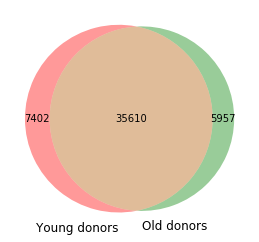

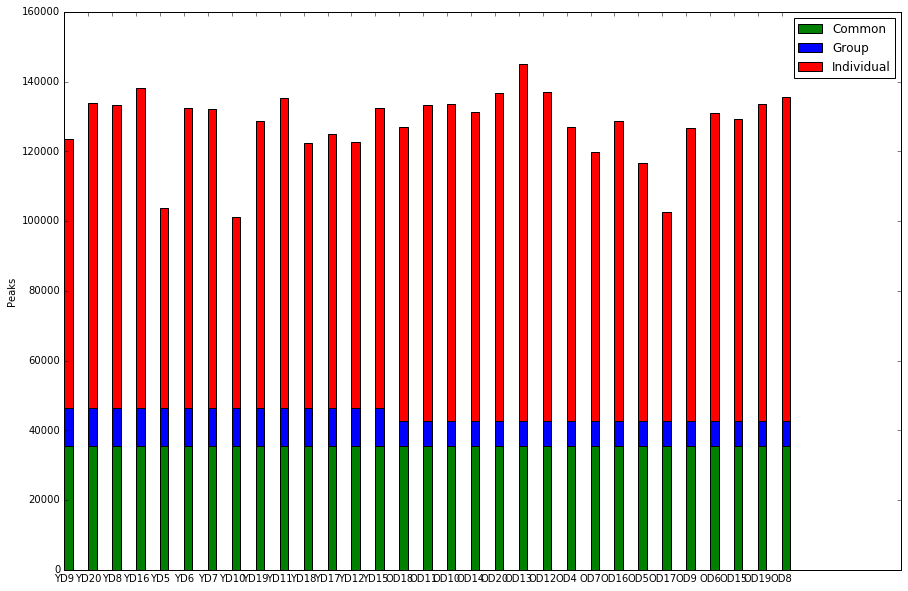

In [6]:
K4me1_YDS, K4me1_ODS = load('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/k4me1_10vs10_reseq_diffbind.csv')
# Filter out tracks with bad quality    
K4me1_YDS = {k:K4me1_YDS[k] for k in K4me1_YDS.keys() if k not in ['YD14']}
intersect_peaks(K4me1_YDS, K4me1_ODS)

# K4me1 macs diff O vs Y

In [9]:
K4me1_YD_pooled_control=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/\
k4me1_10vs10_reseq_diff/diff_k4me1_10vs10_reseq_macs_pooled_1_vs_2/diff_k4me1_10vs10_reseq_1_vs_2_0.01_peaks.broadPeak')
K4me1_OD_pooled_control=Bed('/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/\
k4me1_10vs10_reseq_diff/diff_k4me1_10vs10_reseq_macs_pooled_1_vs_2/diff_k4me1_10vs10_reseq_2_vs_1_0.01_peaks.broadPeak')
print('YD exclusive', K4me1_YD_pooled_control.count())
K4me1_YD_pooled_control.process_pvalue()
print('OD exclusive', K4me1_OD_pooled_control.count())
K4me1_OD_pooled_control.process_pvalue()

YD exclusive 26
TRACE /var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtrace3cc414dj_trace.bed
RESULT /var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtrace3cc414dj_pvalue.bed
HEAD
chr22	42924802	42925077	9.17585
chr16	58490899	58491881	8.94564
chrUn_gl000224	84383	84976	8.06881
chrUn_gl000219	64348	64860	7.82421
chrUn_gl000219	53849	54257	7.77513

TAIL
chr13	113165533	113165824	6.73941
chrUn_gl000224	144978	145544	6.71542
chr22	46822013	46822246	6.71222
chrUn_gl000219	163930	164076	6.70178
chr6	157222597	157222920	6.58113

OD exclusive 1715
TRACE /var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtracejqi7z6al_trace.bed
RESULT /var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtracejqi7z6al_pvalue.bed
HEAD
chr11	66153619	66153970	10.49938
chrX	96400821	96401174	10.21477
chr7	133991917	133992534	9.92394
chr4	132534963	132535337	9.80003
chr4	170865327	170865512	9.74457

TAIL
chr10	17123760	17124069	5.6296
chr8	42644060	42644605	5.62735
chr4	74033013	74033229	5.62444
chr6	8529140

'/var/folders/td/g2ws4hwj5tj48_j_tsfz8_tc0000gp/T/bedtracejqi7z6al_pvalue.bed'